


----------------------------
## Context: 
-----------------------------
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.


----------------------------
## Objective: 
-----------------------------

Identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

--------------------------
## About the data:
--------------------------
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call centre.

- Sl_no - Customer Serial Number
- Customer Key - Customer identification
- Avg_Credit_Limit	- Average credit limit (currency is not specified, you can make an assumption around this)
- Total_Credit_Cards	- Total number of credit cards 
- Total_visits_bank	- Total bank visits
- Total_visits_online -	 Total online visits
- Total_calls_made - Total calls made

## Importing libraries and overview of the dataset

In [1]:
#Import all the necessary packages

import pandas as pd
import numpy as np

import matplotlib.pylab as plt
import seaborn as sns

#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler

#importing clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture


#if the below line of code gives an error, then uncomment the following code to install the sklearn_extra library
!pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids

import warnings
warnings.filterwarnings("ignore")

#### Loading data

In [2]:
data = pd.read_excel('Credit+Card+Customer+Data+Update.xlsx')
data.head()

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


#### Check the info of the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


**Observations:**

- There are 660 observations and 7 columns in the dataset.
- All columns have 660 non-null values i.e. there are no missing values.
- All columns are of int64 data type.

**There are no missing values. Let us now figure out the uniques in each column.** 

In [4]:
data.nunique()

Sl_No                  660
Customer_Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

- Customer key, which is an identifier, has repeated values. We should treat the same accordingly before applying any algorithm.

## Data Preprocessing and Exploratory Data Analysis

In [6]:
# Identify the duplicated customer keys
duplicate_keys = data.Customer_Key.duplicated()
duplicate_keys

0      False
1      False
2      False
3      False
4      False
       ...  
655    False
656    False
657    False
658    False
659    False
Name: Customer_Key, Length: 660, dtype: bool

In [8]:
# Drop duplicated keys
data.drop_duplicates(subset="Customer_Key",keep="first")

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


We have done some basic checks. Now, let's drop the variables that are not required for our analysis.

In [9]:
data.drop(columns = ['Sl_No', 'Customer_Key'], inplace = True)

Now that we have dropped unnecessary column. We can again check for duplicates. Duplicates would mean customers with identical features.

In [10]:
data[data.duplicated()]

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
162,8000,2,0,3,4
175,6000,1,0,2,5
215,8000,4,0,4,7
295,10000,6,4,2,3
324,9000,4,5,0,4
361,18000,6,3,1,4
378,12000,6,5,2,1
385,8000,7,4,2,0
395,5000,4,5,0,1
455,47000,6,2,0,4


We can drop these duplicated rows from the data

In [11]:
data=data[~data.duplicated()]

In [12]:
data.shape

(649, 5)

- After removing duplicated keys and rows and unnecessary columns, there are 644 unique observations and 5 columns in our data.

#### Summary Statistics

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,649.0,34878.274268,37813.736638,3000.0,11000.0,18000.0,49000.0,200000.0
Total_Credit_Cards,649.0,4.708783,2.173763,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,649.0,2.397535,1.625148,0.0,1.0,2.0,4.0,5.0
Total_visits_online,649.0,2.624037,2.952888,0.0,1.0,2.0,4.0,15.0
Total_calls_made,649.0,3.590139,2.877911,0.0,1.0,3.0,5.0,10.0


**Observations:___________**

The variables with the highest relative std are Average Credit Limit, Total Visits Online, and Total Calls Made with stds of 37813.736638, 2.952888, and 2.877911 respectively. 

The means of the Total Credit Cards and Average Credit Limit is 4.70878 and 34878.274268 respectively.

The means of the Total Bank Visits and Total Visits Online are very similar with means of 2.397535 and 2.624037 respectively.

It appears that the most frequent way to contact the back is via telephone calls with a mean of 3.590139.

#### Now let's go ahead with the exploring each variable at hand. We will check the distribution and outliers for each variable in the data.

Avg_Credit_Limit
Skew : 2.19


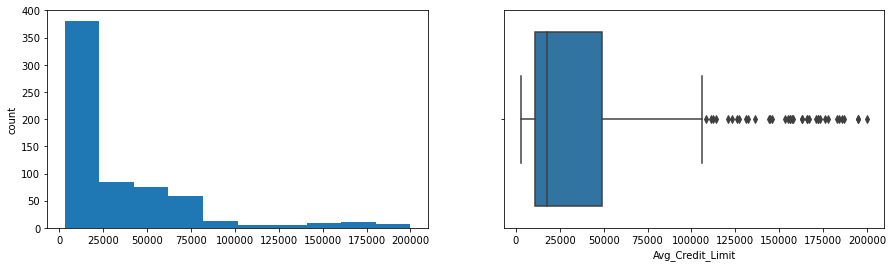

Total_Credit_Cards
Skew : 0.15


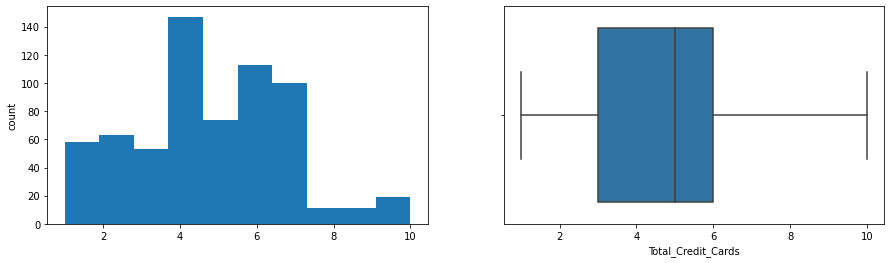

Total_visits_bank
Skew : 0.15


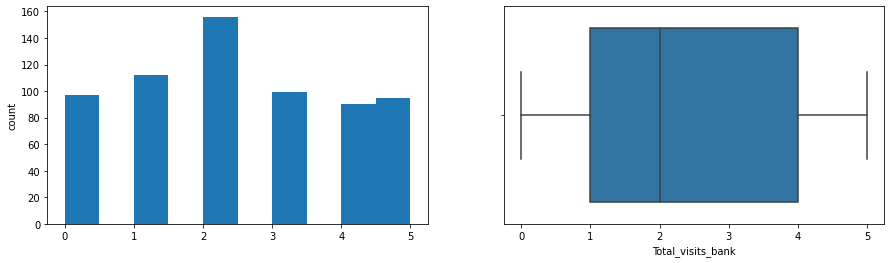

Total_visits_online
Skew : 2.21


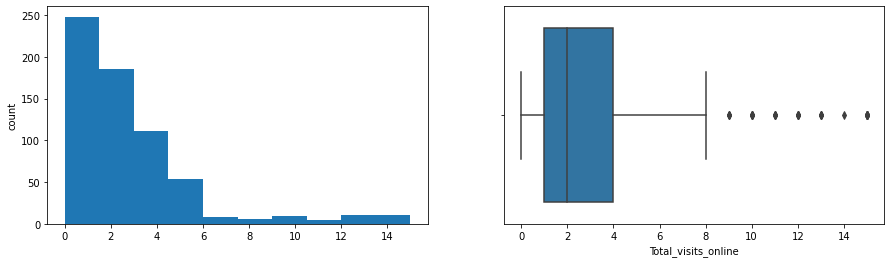

Total_calls_made
Skew : 0.66


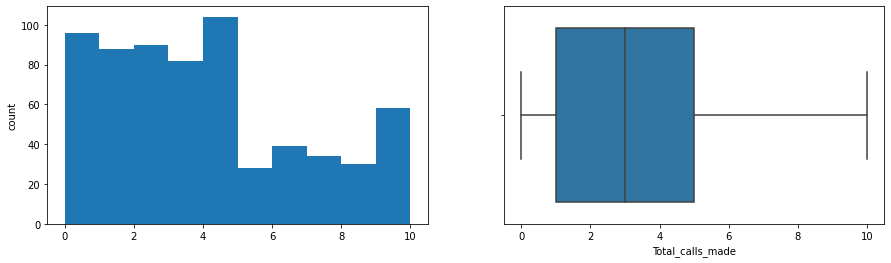

In [14]:
cont_cols = list(data.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()

**Observation:______________**

The two variables that have outliers are Total Visits Online and Average Credit Limit with Skew values of 2.21 and 2.19 respectively. This means that the distribution for these two variables is skewed left.

The other variables do not have any outliers and have skew values from 0 to 1.

Total Banks Visits and Total Credit Cards have the same skew of 0.15.



**Now, let's check the correlation among different variables.**

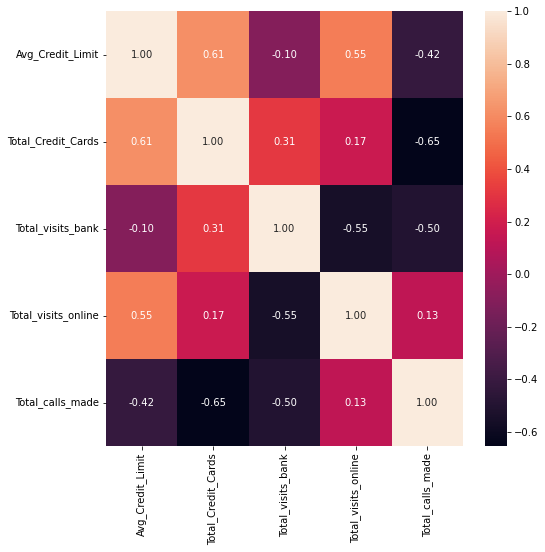

In [15]:
plt.figure(figsize=(8,8))
sns.heatmap(data.corr(), annot=True, fmt='0.2f')
plt.show()

**Observation:**

- Avg_Credit_Limit is positively correlated with Total_Credit_Cards Total_visits_online which can makes sense.
- Avg_Credit_Limit is negatively correlated with Total_calls_made and Total_visits_bank.
- Total_visits_bank, Total_visits_online, Total_calls_made are negatively correlated which implies that majority of customers use only one of these channels to contact the bank.

#### Scaling the data

In [16]:
scaler=StandardScaler()
data_scaled=pd.DataFrame(scaler.fit_transform(data), columns=data.columns)

In [17]:
data_scaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.723499,-1.247087,-0.860606,-0.550407,-1.248443
1,0.400209,-0.786701,-1.476410,2.499808,1.881237
2,0.400209,1.054846,-0.860606,0.127419,0.142526
3,-0.129107,0.134072,-0.860606,-0.550407,0.142526
4,1.723499,0.594459,-1.476410,3.177634,-0.205216


In [18]:
#Creating copy of the data to store labels from each algorithm
data_scaled_copy = data_scaled.copy(deep=True)

## K-Means

Let us now fit k-means algorithm on our scaled data and find out the optimum number of clusters to use.

We will do this in 3 steps:
1. Initialize a dictionary to store the SSE for each k
2. Run for a range of Ks and store SSE for each run
3. Plot the SSE vs K and find the elbow

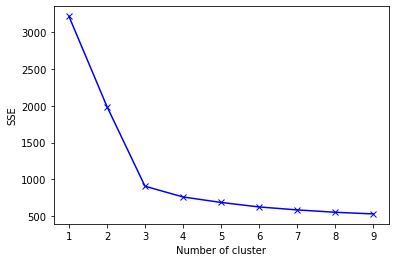

In [ ]:
# step 1
sse = {} 

# step 2 - iterate for a range of Ks and fit the scaled data to the algorithm. Use inertia attribute from the clustering object and 
# store the inertia value for that k 
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, random_state=1).fit(data_scaled)
    sse[k] = kmeans.inertia_

# step 3
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), 'bx-')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

- Looking at the plot, we can say that elbow point is achieved for k=3.
- We will fit the k-means again with k=3 to get the labels.

In [19]:
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(data_scaled)

#Adding predicted labels to the original data and scaled data 
data_scaled_copy['Labels'] = kmeans.predict(data_scaled)
data['Labels'] = kmeans.predict(data_scaled)

We have generated the labels with k-means. Let us look at the various features based on the labels.

In [20]:
#Number of observations in each cluster
data.Labels.value_counts()

1    378
0    221
2     50
Name: Labels, dtype: int64

In [21]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('Labels').mean()
median = data.groupby('Labels').median()
df_kmeans = pd.concat([mean, median], axis=0)
df_kmeans.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmeans.T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,34071.428571,141040.00,12000.0,32000.0,145500.0
Total_Credit_Cards,2.411765,5.518519,8.74,2.0,6.0,9.0
Total_visits_bank,0.945701,3.484127,0.60,1.0,3.0,1.0
Total_visits_online,3.561086,0.981481,10.90,4.0,1.0,11.0
Total_calls_made,6.891403,1.992063,1.08,7.0,2.0,1.0


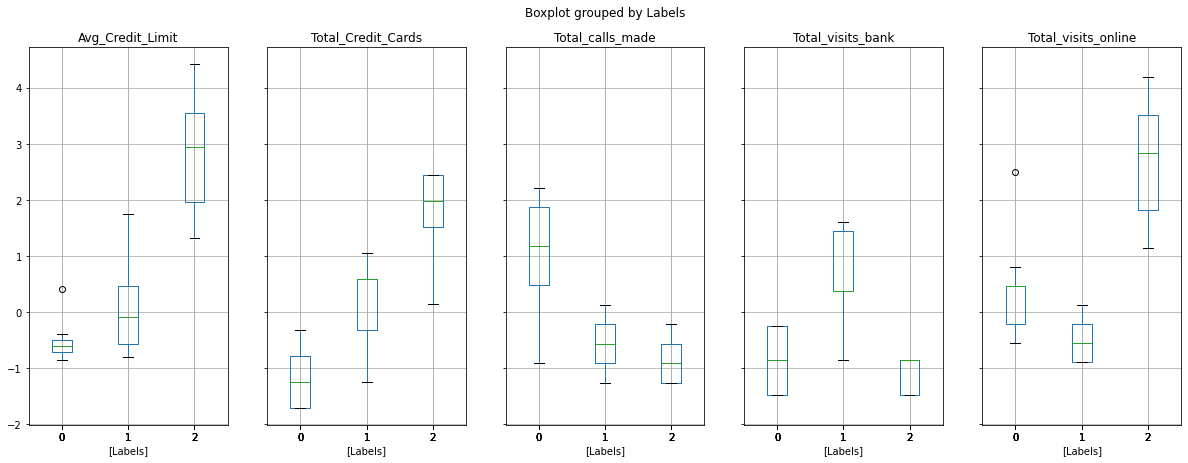

In [ ]:
#Visualizing different features w.r.t K-means labels
data_scaled_copy.boxplot(by = 'Labels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:_______________**

Group 0 appears to be the cluster of customers with the lowest average credit limit. This group also has the least amount of total credit cards. This group makes the most telephone calls to the bank on average.

Group 1 appears to be the cluster of customers with the middle level for average credit limit. This group also has the middle level of total credit cards. This group makes the most total visits to the bank.

Group 2 appears to be the cluster of customers with the highest average credit limit. This group also has the highest amount of total credit cards. This group makes the most total visits online to the bank.

## Gaussian Mixture

Let's create clusters using Gaussian Mixture Models

In [22]:
gmm = GaussianMixture(n_components = 3, random_state = 1)
gmm.fit(data_scaled)

data_scaled_copy['GmmLabels'] = gmm.predict(data_scaled)
data['GmmLabels'] = gmm.predict(data_scaled)

In [23]:
#Number of observations in each cluster
data.GmmLabels.value_counts()

1    378
0    221
2     50
Name: GmmLabels, dtype: int64

In [24]:
#Calculating summary statistics of the original data for each label
original_features = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made"]

mean = data.groupby('GmmLabels').mean()
median = data.groupby('GmmLabels').median()
df_gmm = pd.concat([mean, median], axis=0)
df_gmm.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_gmm[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12239.819005,34071.428571,141040.00,12000.0,32000.0,145500.0
Total_Credit_Cards,2.411765,5.518519,8.74,2.0,6.0,9.0
Total_visits_bank,0.945701,3.484127,0.60,1.0,3.0,1.0
Total_visits_online,3.561086,0.981481,10.90,4.0,1.0,11.0
Total_calls_made,6.891403,1.992063,1.08,7.0,2.0,1.0


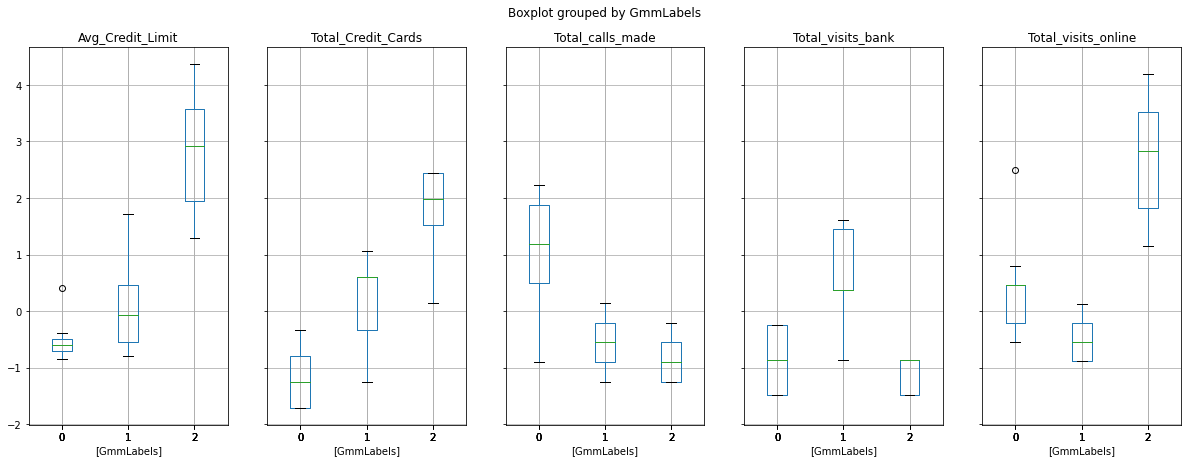

In [25]:
# plotting boxplots with the new GMM based labels

features_with_lables = ["Avg_Credit_Limit","Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","GmmLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'GmmLabels', layout = (1,5),figsize=(20,7))
plt.show()

**Cluster Profiles:____________**

Group 0 appears to be the cluster of customers with the lowest average credit limit. This group also has the least amount of total credit cards. This group makes the most telephone calls to the bank on average.

Group 1 appears to be the cluster of customers with the middle level for average credit limit. This group also has the middle level of total credit cards. This group makes the most total visits to the bank.

Group 2 appears to be the cluster of customers with the highest average credit limit. This group also has the highest amount of total credit cards. This group makes the most total visits online to the bank.


**Comparing Clusters:____________**

It appears that both the Gaussian Mixture Model and the K-Means clusters are identical. This means that both would work. Let's check out K-Medoids next to see if there is any difference in comparison to the aforementioned models.

## K-Medoids

In [26]:
kmedo = KMedoids(n_clusters = 3, random_state=1)
kmedo.fit(data_scaled)

data_scaled_copy['kmedoLabels'] = kmedo.predict(data_scaled)
data['kmedoLabels'] = kmedo.predict(data_scaled)

In [27]:
#Number of observations in each cluster
data.kmedoLabels.value_counts()

2    273
0    221
1    155
Name: kmedoLabels, dtype: int64

In [28]:
#Calculating summary statistics of the original data for each label
mean = data.groupby('kmedoLabels').mean()
median = data.groupby('kmedoLabels').median()
df_kmedoids = pd.concat([mean, median], axis=0)
df_kmedoids.index = ['group_0 Mean', 'group_1 Mean', 'group_2 Mean', 'group_0 Median', 'group_1 Median', 'group_2 Median']
df_kmedoids[original_features].T

,group_0 Mean,group_1 Mean,group_2 Mean,group_0 Median,group_1 Median,group_2 Median
Avg_Credit_Limit,12203.619910,80625.806452,27260.073260,12000.0,66000.0,19000.0
Total_Credit_Cards,2.420814,6.741935,5.406593,2.0,7.0,6.0
Total_visits_bank,0.954751,1.800000,3.904762,1.0,2.0,4.0
Total_visits_online,3.565611,4.187097,0.974359,4.0,2.0,1.0
Total_calls_made,6.904977,2.006452,1.805861,7.0,2.0,2.0


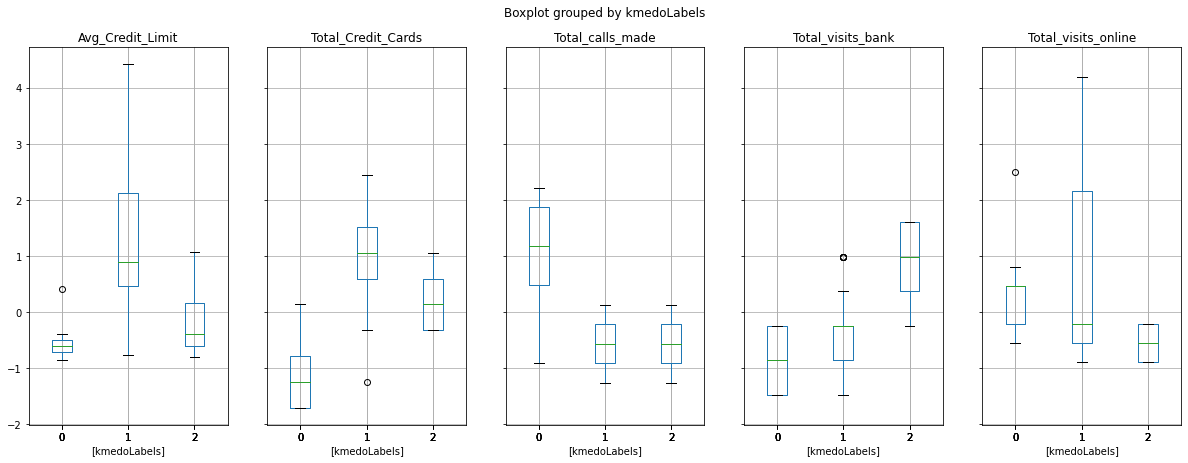

In [ ]:
#plotting boxplots with the new K-Medoids based labels

features_with_lables = ["Avg_Credit_Limit",	"Total_Credit_Cards","Total_visits_bank","Total_visits_online","Total_calls_made","kmedoLabels"]

data_scaled_copy[features_with_lables].boxplot(by = 'kmedoLabels', layout = (1,5),figsize=(20,7))
plt.show()

Let's compare the clusters from K-Means and K-Medoids 

In [29]:
comparison = pd.concat([df_kmedoids, df_kmeans], axis=1)[original_features]
comparison

,Avg_Credit_Limit,Avg_Credit_Limit,Total_Credit_Cards,Total_Credit_Cards,Total_visits_bank,Total_visits_bank,Total_visits_online,Total_visits_online,Total_calls_made,Total_calls_made
group_0 Mean,12203.619910,12239.819005,2.420814,2.411765,0.954751,0.945701,3.565611,3.561086,6.904977,6.891403
group_1 Mean,80625.806452,34071.428571,6.741935,5.518519,1.800000,3.484127,4.187097,0.981481,2.006452,1.992063
group_2 Mean,27260.073260,141040.000000,5.406593,8.740000,3.904762,0.600000,0.974359,10.900000,1.805861,1.080000
group_0 Median,12000.000000,12000.000000,2.000000,2.000000,1.000000,1.000000,4.000000,4.000000,7.000000,7.000000
group_1 Median,66000.000000,32000.000000,7.000000,6.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000
group_2 Median,19000.000000,145500.000000,6.000000,9.000000,4.000000,1.000000,1.000000,11.000000,2.000000,1.000000


**Cluster Profiles:____________**

The K-Medoids also give similar cluster types as the K-Means and Gaussian Mixture Model did. There is a clear high average credit card limit group (group 1), a clear low average credit card limit group (group 0), and another group right in the middle (group 2) with limits between groups 0 and 1.

The other data also follows from the K-Means and Gaussian Mixture Model groups. Group 1 in M-Mediods also had the most online bank visits, Group 0 in M-Mediods also had the most telephone calls to the bank on average, and Group 2 had more bank visits on average. Total credit cards groups for K-Mediods also followed the pattern of group data of K-Means and Gaussian Mixture Model.

**Comparing Clusters:___________________**

There still was three distinct groups for both K-Means and K-Mediods with a high, middle, and low credit limit group (which makes sense). The two different groups also have the same data on phone call, physical visits to the bank, and online bank visits respectively.

The only big difference I can see is the average for K-Means than K-Mediods across most variables. K-Mediods seemed to scale the data closer together to perhaps account for extreme values in the data.